In [2]:
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
from scipy.optimize import leastsq
import scipy.optimize as opt
import scipy
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import CubicSpline
import math

In [3]:
class People:
    def __init__(self, n, a, s):
        self.name = n
        self.age = a
        self.__score = s
        self.print_people()
        #self.__print_people()   # 私有函数的作用

    def print_people(self):
        str = u'%s的年龄：%d，成绩为：%.2f' % (self.name, self.age, self.__score)
        print(str)

    __print_people = print_people


class Student(People):
    def __init__(self, n, a, w):
        People.__init__(self, n, a, w)
        self.name = 'Student ' + self.name

    def print_people(self):
        str = u'%s的年龄：%d' % (self.name, self.age)
        print(str)


def func(p):
    p.age = 11

In [4]:
p = People('Tom', 10, 3.14159)
func(p)     # p传入的是引用类型
p.print_people()
print

# 注意分析下面语句的打印结果，是否觉得有些“怪异”？
j = Student('Jerry', 12, 2.71828)
j.print_people()

#People.print_people(p)
#People.print_people(j)

Tom的年龄：10，成绩为：3.14
Tom的年龄：11，成绩为：3.14
Jerry的年龄：12
Student Jerry的年龄：12


In [18]:
# 标准Python的列表(list)中，元素本质是对象。
# 如：L = [1, 2, 3]，需要3个指针和三个整数对象，对于数值运算比较浪费内存和CPU。
# 因此，Numpy提供了ndarray(N-dimensional array object)对象：存储单一数据类型的多维数组。
    
L = [1, 2, 3, 4, 5, 6]
print("L = ", L)
a = np.array(L)
print("a = ", a)
print(type(a))
    
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(b)
print(b.shape)

b.shape = 4, 3
print(b)


L =  [1, 2, 3, 4, 5, 6]
a =  [1 2 3 4 5 6]
<class 'numpy.ndarray'>
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [20]:
# 使用reshape方法，可以创建改变了尺寸的新数组，原数组的shape保持不变
c = b.reshape((3, -1))
print("b = \n", b)
print('c = \n', c)

b = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
c = 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [21]:
# 数组b和c共享内存，修改任意一个将影响另外一个
b[0][1] = 20
print("b = \n", b)
print("c = \n", c)

b = 
 [[ 1 20  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
c = 
 [[ 1 20  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [22]:
# 数组的元素类型可以通过dtype属性获得
print(a.dtype)
print(b.dtype)

int32
int32


In [28]:
# 可以通过dtype参数在创建时指定元素类型
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=np.float)
f = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=np.complex)
print(d)
print(f)
    

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
[[ 1.+0.j  2.+0.j  3.+0.j  4.+0.j]
 [ 5.+0.j  6.+0.j  7.+0.j  8.+0.j]
 [ 9.+0.j 10.+0.j 11.+0.j 12.+0.j]]


In [29]:
# 如果更改元素类型，可以使用astype安全的转换
f = d.astype(np.int)
print(f)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [33]:
# # 但不要强制仅修改元素类型，如下面这句，将会以int来解释单精度float类型
# d.dtype = np.int
print(d)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


In [32]:
# 2.使用函数创建
# 如果生成一定规则的数据，可以使用NumPy提供的专门函数
# arange函数类似于python的range函数：指定起始值、终止值和步长来创建数组
# 和Python的range类似，arange同样不包括终值；但arange可以生成浮点类型，而range只能是整数类型
a = np.arange(1, 10, 0.5)
print(a)

[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.  9.5]


In [35]:
# linspace函数通过指定起始值、终止值和元素个数来创建数组，缺省包括终止值
b = np.linspace(1, 10, 11)
print('b = ', b)

b =  [ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1 10. ]


In [37]:
# 和linspace类似，logspace可以创建等比数列
# 下面函数创建起始值为10^1，终止值为10^2，有20个数的等比数列
d = np.logspace(1, 2, 20, endpoint=True)
print(d)

[ 10.          11.28837892  12.74274986  14.38449888  16.23776739
  18.32980711  20.69138081  23.35721469  26.36650899  29.76351442
  33.59818286  37.92690191  42.81332399  48.32930239  54.55594781
  61.58482111  69.51927962  78.47599704  88.58667904 100.        ]


In [42]:
# # 下面创建起始值为2^0，终止值为2^10(包括)，有10个数的等比数列
f = np.logspace(1, 10, 10, endpoint=True, base=2)
print(f)

[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


In [46]:
# 使用 frombuffer, fromstring, fromfile等函数可以从字节序列创建数组
s = 'abcd'
g = np.fromstring(s, dtype=np.int8)
print(g)

[ 97  98  99 100]


d:\ProgramData\Anaconda2\envs\py3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
# 3.1常规办法：数组元素的存取方法和Python的标准方法相同
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [48]:
# 步长为-1，即翻转
print(a[::-1])

[9 8 7 6 5 4 3 2 1 0]


In [50]:
# 切片数据是原数组的一个视图，与原数组共享内容空间，可以直接修改元素值
a[1:4] = 10, 20, 30
print(a)

[ 0 10 20 30  4  5  6  7  8  9]


In [52]:
# # # # 因此，在实践中，切实注意原始数据是否被破坏，如：
b = a[2:5]
b[0] = 200
print(a)

[  0  10 200  30   4   5   6   7   8   9]


In [54]:
# 3.2 整数/布尔数组存取
# # 3.2.1
# 根据整数数组存取：当使用整数序列对数组元素进行存取时，
# 将使用整数序列中的每个元素作为下标，整数序列可以是列表(list)或者数组(ndarray)。
# 使用整数序列作为下标获得的数组不和原始数组共享数据空间。
a = np.logspace(0, 9, 10, base=2)
print(a)
i = np.arange(0, 10, 2)
print(i)
# # # # 利用i取a中的元素
b = a[i]
print(b)
# # # b的元素更改，a中元素不受影响
b[2] = 1.6
print(b)
print(a)

[  1.   2.   4.   8.  16.  32.  64. 128. 256. 512.]
[0 2 4 6 8]
[  1.   4.  16.  64. 256.]
[  1.    4.    1.6  64.  256. ]
[  1.   2.   4.   8.  16.  32.  64. 128. 256. 512.]


In [57]:
# 3.2.2
# 使用布尔数组i作为下标存取数组a中的元素：返回数组a中所有在数组b中对应下标为True的元素
# 生成10个满足[0,1)中均匀分布的随机数
a = np.random.rand(10)
print(a)
# # 大于0.5的元素索引
print(a > 0.5)
# # # 大于0.5的元素
b = a[a > 0.5]
print(b)
# # # 将原数组中大于0.5的元素截取成0.5
a[a > 0.5] = 0.5
print(a)
# # # b不受影响
print(b)

[0.89287813 0.74210435 0.45724904 0.91447156 0.06080833 0.05433297
 0.65949708 0.81032281 0.70724333 0.57346422]
[ True  True False  True False False  True  True  True  True]
[0.89287813 0.74210435 0.91447156 0.65949708 0.81032281 0.70724333
 0.57346422]
[0.5        0.5        0.45724904 0.5        0.06080833 0.05433297
 0.5        0.5        0.5        0.5       ]
[0.89287813 0.74210435 0.91447156 0.65949708 0.81032281 0.70724333
 0.57346422]


In [59]:
# 3.3 二维数组的切片
a = np.arange(0, 60, 10)    # 行向量
print('a = ', a)
b = a.reshape((-1, 1))      # 转换成列向量
print('b = ', b)
c = np.arange(6)
print('c = ', c)
f = b + c   # 行 + 列
print('f = ', f)

a =  [ 0 10 20 30 40 50]
b =  [[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]]
c =  [0 1 2 3 4 5]
f =  [[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [61]:
# 合并上述代码：
a = np.arange(0, 60, 10).reshape((-1, 1)) + np.arange(6)
print(a)
# 二维数组的切片
print(a[(0,1,2,3), (2,3,4,5)])
print(a[3:, [0, 2, 5]])
i = np.array([True, False, True, False, False, True])
print(a[i])
print(a[i, 3])

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]
[ 2 13 24 35]
[[30 32 35]
 [40 42 45]
 [50 52 55]]
[[ 0  1  2  3  4  5]
 [20 21 22 23 24 25]
 [50 51 52 53 54 55]]
[ 3 23 53]


In [65]:
    # 4. numpy与Python数学库的时间比较
    for j in np.logspace(0, 7, 8):
        j = int(j)
        x = np.linspace(0, 10, j)
        start = time.clock()
        y = np.sin(x)
        t1 = time.clock() - start
    
        x = x.tolist()
        start = time.clock()
        for i, t in enumerate(x):
            x[i] = math.sin(t)
        t2 = time.clock() - start
        print(j, ": ", t1, t2, t2/t1)

1 :  0.006633131798707836 7.168001218360587e-06 0.0010806360307444736
10 :  3.754667261546274e-06 5.461334296796849e-06 1.4545454806953315
100 :  3.413333899970894e-06 2.764800473187279e-05 8.100000041633356
1000 :  2.184533707350056e-05 0.00026521604524987197 12.140624992762952
10000 :  0.0002542933767131217 0.003002709845816298 11.808053692266522
100000 :  0.001252010880364196 0.028384602177652596 22.671210468551063
1000000 :  0.002640896450714081 0.27519253763284723 104.20421351940436
10000000 :  0.025040217606886017 2.8790710406947824 114.97787622672428


(50,)
x = 
 [-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408 -2.3877551
 -2.26530612 -2.14285714 -2.02040816 -1.89795918 -1.7755102  -1.65306122
 -1.53061224 -1.40816327 -1.28571429 -1.16326531 -1.04081633 -0.91836735
 -0.79591837 -0.67346939 -0.55102041 -0.42857143 -0.30612245 -0.18367347
 -0.06122449  0.06122449  0.18367347  0.30612245  0.42857143  0.55102041
  0.67346939  0.79591837  0.91836735  1.04081633  1.16326531  1.28571429
  1.40816327  1.53061224  1.65306122  1.7755102   1.89795918  2.02040816
  2.14285714  2.26530612  2.3877551   2.51020408  2.63265306  2.75510204
  2.87755102  3.        ]
(50,)
y = 
 [0.00443185 0.00635135 0.00896675 0.01247075 0.01708592 0.02306069
 0.03066159 0.04016108 0.05182083 0.0658706  0.08248352 0.10174921
 0.12364689 0.1480211  0.17456307 0.20280069 0.2320998  0.26167871
 0.29063661 0.31799518 0.34275126 0.36393672 0.38068082 0.39226937
 0.39819528 0.39819528 0.39226937 0.38068082 0.36393672 0.34275126
 0.31799518 0.29063661 0.2616787

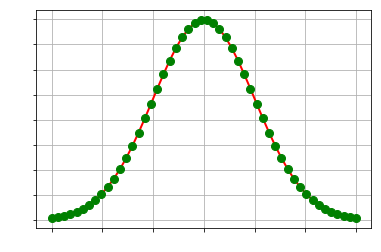

In [73]:
    # 5.绘图
    # 5.1 绘制正态分布概率密度函数
    mu = 0
    sigma = 1
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 50)
    y = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (math.sqrt(2 * math.pi) * sigma)
    print(x.shape)
    print('x = \n', x)
    print(y.shape)
    print('y = \n', y)
    # plt.plot(x, y, 'ro-', linewidth=2)
    plt.plot(x, y, 'r-', x, y, 'go', linewidth=2, markersize=8)
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.grid(True)
    plt.show()

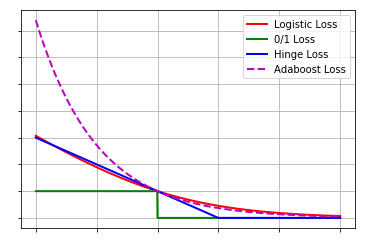

In [76]:
    # 5.2 损失函数：Logistic损失(-1,1)/SVM Hinge损失/ 0/1损失
    x = np.array(np.linspace(start=-2, stop=3, num=1001, dtype=np.float))
    y_logit = np.log(1 + np.exp(-x)) / math.log(2)
    y_boost = np.exp(-x)
    y_01 = x < 0
    y_hinge = 1.0 - x
    y_hinge[y_hinge < 0] = 0
    plt.plot(x, y_logit, 'r-', label='Logistic Loss', linewidth=2)
    plt.plot(x, y_01, 'g-', label='0/1 Loss', linewidth=2)
    plt.plot(x, y_hinge, 'b-', label='Hinge Loss', linewidth=2)
    plt.plot(x, y_boost, 'm--', label='Adaboost Loss', linewidth=2)
    plt.grid()
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.legend(loc='upper right')
    # plt.savefig('1.png')
    plt.show()

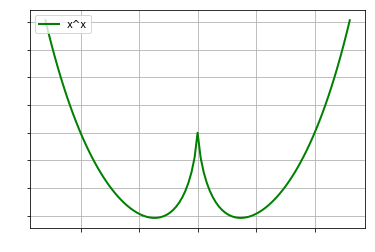

In [83]:
# x ** x        x > 0
# (-x) ** (-x)  x < 0
def f(x):
    y = np.ones_like(x)
    i = x > 0
    y[i] = np.power(x[i], x[i])
    i = x < 0
    y[i] = np.power(-x[i], -x[i])
    return y

# # 5.3 x^x
x = np.linspace(-1.3, 1.3, 101)
y = f(x)
plt.plot(x, y, 'g-', label='x^x', linewidth=2)
plt.grid()
plt.xticks(color='w')
plt.yticks(color='w')
plt.legend(loc='upper left')
plt.show()

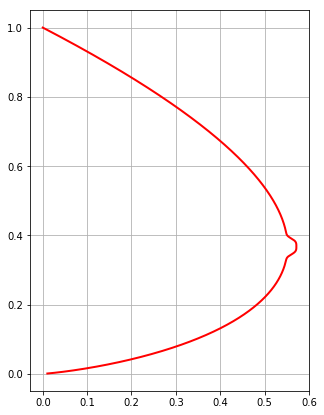

In [93]:
    # 5.4 胸型线
    x = np.arange(1, 0, -0.001)
    y = (-3 * x * np.log(x) + np.exp(-(40 * (x - 1 / np.e)) ** 4) / 25) / 2
    plt.figure(figsize=(5,7))
    plt.plot(y, x, 'r-', linewidth=2)
    plt.grid(True)
    plt.show()

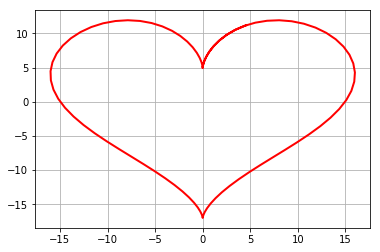

In [94]:
    # 5.5 心形线
    t = np.linspace(0, 7, 100)
    x = 16 * np.sin(t) ** 3
    y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
    plt.plot(x, y, 'r-', linewidth=2)
    plt.grid(True)
    plt.show()

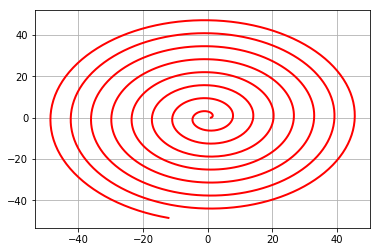

In [95]:
    # 5.6 渐开线
    t = np.linspace(0, 50, num=1000)
    x = t*np.sin(t) + np.cos(t)
    y = np.sin(t) - t*np.cos(t)
    plt.plot(x, y, 'r-', linewidth=2)
    plt.grid()
    plt.show()

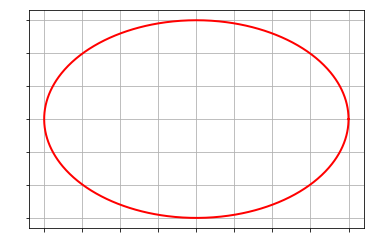

In [102]:
    # 椭圆
    a = 10
    b = 6
    t = np.linspace(0, 2*np.pi, num=1000)
    x = a*np.cos(t)
    y = b*np.sin(t)
    plt.plot(x, y, 'r-', linewidth=2)
    plt.grid()
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.show()

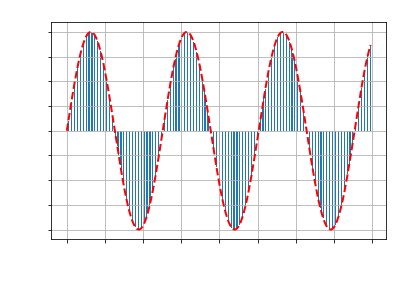

In [113]:
    # Bar
    matplotlib.rcParams['font.sans-serif'] = [u'SimHei']  #黑体 FangSong/KaiTi
    matplotlib.rcParams['axes.unicode_minus'] = False
    x = np.arange(0, 20, 0.1)
    y = np.sin(x)
    plt.bar(x, y, width=0.04, linewidth=0.2)
    plt.plot(x, y, 'r--', linewidth=2)
    plt.title(u'Sin曲线', color='w')
    plt.xticks(rotation=-60)
    plt.xlabel('X', color='w')
    plt.ylabel('Y', color='w')
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.grid()
    plt.show()

#概率分布 

No handles with labels found to put in legend.


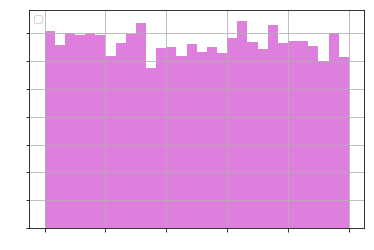

In [123]:
    # 6.1 均匀分布
    x = np.random.rand(10000)
    t = np.arange(len(x))
    plt.hist(x, 30, color='m', alpha=0.5)
    #plt.plot(t, x, 'r-', label=u'均匀分布')
    plt.legend(loc='upper left')
    plt.grid()
    plt.xticks(color='w')
    plt.yticks(color='w')
    plt.show()

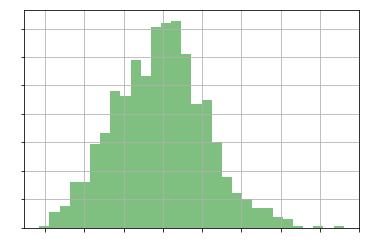

In [126]:
# 6.2 验证中心极限定理
t = 10000
a = np.zeros(1000)
for i in range(t):
    a += np.random.uniform(-5, 5, 1000)
a /= t
plt.hist(a, bins=30, color='g', alpha=0.5, normed=True)
plt.grid()
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()

[4 6 6 ... 3 6 2]
(array([0.00870087, 0.03310331, 0.08150815, 0.14361436, 0.18121812,
       0.17911791, 0.14391439, 0.10051005, 0.06280628, 0.0350035 ,
       0.01740174, 0.00760076, 0.0030003 , 0.00170017, 0.00080008]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.]), <a list of 15 Patch objects>)
1.0


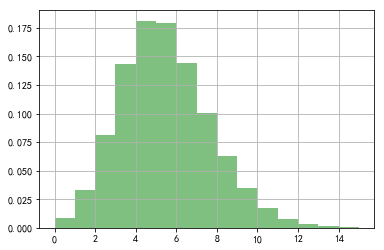

In [130]:
    # 6.3 Poisson分布
    x = np.random.poisson(lam=5, size=10000)
    print(x)
    pillar = 15
    a = plt.hist(x, bins=pillar, normed=True, range=[0, pillar], color='g', alpha=0.5)
    plt.grid()
    # plt.show()
    print(a)
    print(a[0].sum())

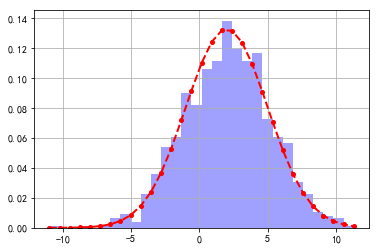

In [131]:
    # 6.4 直方图的使用
    mu = 2
    sigma = 3
    data = mu + sigma * np.random.randn(1000)
    h = plt.hist(data, 30, normed=1, color='#a0a0ff')
    x = h[1]
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, y, 'r--', x, y, 'ro', linewidth=2, markersize=4)
    plt.grid()
    plt.show()

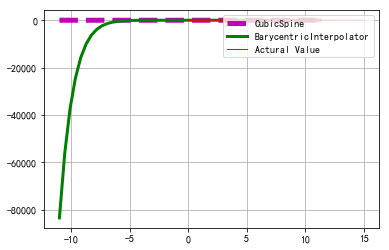

In [132]:
   # 6.5 插值
    rv = poisson(5)
    x1 = a[1]
    y1 = rv.pmf(x1)
    itp = BarycentricInterpolator(x1, y1)  # 重心插值
    x2 = np.linspace(x.min(), x.max(), 50)
    y2 = itp(x2)
    cs = scipy.interpolate.CubicSpline(x1, y1)       # 三次样条插值
    plt.plot(x2, cs(x2), 'm--', linewidth=5, label='CubicSpine')           # 三次样条插值
    plt.plot(x2, y2, 'g-', linewidth=3, label='BarycentricInterpolator')   # 重心插值
    plt.plot(x1, y1, 'r-', linewidth=1, label='Actural Value')             # 原始值
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

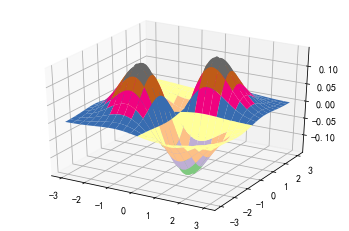

In [134]:
 # 7. 绘制三维图像
    x, y = np.ogrid[-3:3:100j, -3:3:100j]
    # u = np.linspace(-3, 3, 101)
    # x, y = np.meshgrid(u, u)
    z = x*y*np.exp(-(x**2 + y**2)/2) / math.sqrt(2*math.pi)
    # z = x*y*np.exp(-(x**2 + y**2)/2) / math.sqrt(2*math.pi)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.coolwarm, linewidth=0.1)  #
    ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.Accent, linewidth=0.5)
    plt.show()
    # cmaps = [('Perceptually Uniform Sequential',
    #           ['viridis', 'inferno', 'plasma', 'magma']),
    #          ('Sequential', ['Blues', 'BuGn', 'BuPu',
    #                          'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
    #                          'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
    #                          'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
    #          ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool',
    #                              'copper', 'gist_heat', 'gray', 'hot',
    #                              'pink', 'spring', 'summer', 'winter']),
    #          ('Diverging', ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
    #                         'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
    #                         'seismic']),
    #          ('Qualitative', ['Accent', 'Dark2', 'Paired', 'Pastel1',
    #                           'Pastel2', 'Set1', 'Set2', 'Set3']),
    #          ('Miscellaneous', ['gist_earth', 'terrain', 'ocean', 'gist_stern',
    #                             'brg', 'CMRmap', 'cubehelix',
    #                             'gnuplot', 'gnuplot2', 'gist_ncar',
    #                             'nipy_spectral', 'jet', 'rainbow',
    #                             'gist_rainbow', 'hsv', 'flag', 'prism'])]


真实值： 2 3 -1
预测值： [ 2.0228641   3.0211544  -0.66238062]


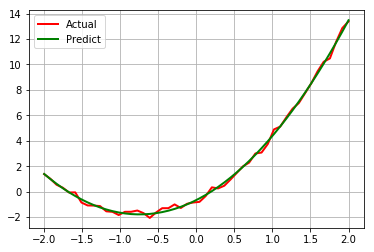

In [6]:
# 8.1 scipy
def residual(t, x, y):
    return y - (t[0] * x ** 2 + t[1] * x + t[2])

def residual2(t, x, y):
    print(t[0], t[1])
    return y - t[0]*np.sin(t[1]*x)

# 线性回归例1
x = np.linspace(-2, 2, 50)
A, B, C = 2, 3, -1
y = (A * x ** 2 + B * x + C) + np.random.rand(len(x))*0.75
    
t = leastsq(residual, [0, 0, 0], args=(x, y))
theta = t[0]
print('真实值：', A, B, C)
print('预测值：', theta)
y_hat = theta[0] * x ** 2 + theta[1] * x + theta[2]
plt.plot(x, y, 'r-', linewidth=2, label=u'Actual')
plt.plot(x, y_hat, 'g-', linewidth=2, label=u'Predict')
plt.legend(loc='upper left')
plt.grid()
plt.show()

d:\ProgramData\Anaconda2\envs\py3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in power


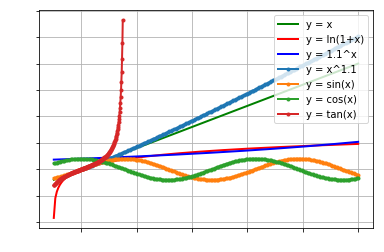

In [19]:
# x ** x        x > 0
# (-x) ** (-x)  x < 0
# 线性函数
def f_x_y(x):
    y = np.ones_like(x)
    y = x
    return y

# 对数函数
def f_ln(x):
    y = np.ones_like(x)
    z = 1 + x
    #print(z)
    for i in range(201): 
        y[i] = math.log(z[i],math.e)
    return y

# 指数函数
def f_exp(a, x):
    y = np.ones_like(x)
    y = a**x
    return y

# 幂函数
def f_power(x, a):
    y = np.ones_like(x)
    y = x**a
    return y

x = np.linspace(-0.99, 10, 201)
y = f_x_y(x)
plt.plot(x, y, 'g-', label='y = x', linewidth=2)

y = f_ln(x)
plt.plot(x, y, 'r-', label='y = ln(1+x)', linewidth=2)

y = f_exp(1.1, x)
plt.plot(x, y, 'b-', label='y = 1.1^x', linewidth=2)

y = f_power(x, 1.1)
plt.plot(x, y, '.-', label='y = x^1.1', linewidth=2)

y = np.sin(x)
plt.plot(x, y, '.-', label='y = sin(x)', linewidth=2)

y = np.cos(x)
plt.plot(x, y, '.-', label='y = cos(x)', linewidth=2)

t = np.linspace(-0.99, 1.5, 201)
y = np.tan(t)
plt.plot(t, y, '.-', label='y = tan(x)', linewidth=2)

plt.grid()
plt.xticks(color='w')
plt.yticks(color='w')
plt.legend(loc='upper right')
plt.show()